In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
ipl_data1 = pd.read_csv('ipl.csv')
ipl_data1.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [5]:
ipl_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [6]:
ipl_data1.shape

(76014, 15)

In [7]:
columns_to_remove = ['mid','non-striker','striker','batsman','bowler']
ipl_data1.drop(columns_to_remove,axis=1,inplace=True)

In [8]:
ipl_data1.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [9]:
venue_map = ipl_data1['venue'].value_counts().to_dict()

In [10]:
ipl_data1['venue'] = ipl_data1['venue'].map(venue_map)

In [11]:
ipl_data1.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,7443,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,7443,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,7443,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,7443,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,7443,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [12]:
ipl_data1['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [13]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab','Royal Challengers Bangalore', 
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [14]:
ipl_data1 = ipl_data1[(ipl_data1['bat_team'].isin(consistent_teams)) & (ipl_data1['bowl_team'].isin(consistent_teams)) ]

In [15]:
ipl_data1 = ipl_data1[ipl_data1['overs'] >= 5.0]

In [16]:
ipl_data1.head()

,date,venue,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,7443,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,7443,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,7443,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,7443,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,7443,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [17]:
ipl_data1['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

In [18]:
ipl_data1['bowl_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rajasthan Royals', 'Mumbai Indians',
       'Chennai Super Kings', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad'], dtype=object)

In [19]:
ipl_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            40108 non-null  object 
 1   venue           40108 non-null  int64  
 2   bat_team        40108 non-null  object 
 3   bowl_team       40108 non-null  object 
 4   runs            40108 non-null  int64  
 5   wickets         40108 non-null  int64  
 6   overs           40108 non-null  float64
 7   runs_last_5     40108 non-null  int64  
 8   wickets_last_5  40108 non-null  int64  
 9   total           40108 non-null  int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 3.4+ MB


In [20]:
from datetime import datetime
ipl_data1['date'] = ipl_data1['date'].apply(lambda x: datetime.strptime(x , '%Y-%m-%d') )

In [21]:
encoded_data = pd.get_dummies(data=ipl_data1,columns=['bat_team' , 'bowl_team'])

In [22]:
encoded_data.head()

,date,venue,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,7443,61,0,5.1,59,0,222,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,7443,61,1,5.2,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,7443,61,1,5.3,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,7443,61,1,5.4,59,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,7443,61,1,5.5,58,1,222,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
encoded_data.columns

Index(['date', 'venue', 'runs', 'wickets', 'overs', 'runs_last_5',
       'wickets_last_5', 'total', 'bat_team_Chennai Super Kings',
       'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
       'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians',
       'bat_team_Rajasthan Royals', 'bat_team_Royal Challengers Bangalore',
       'bat_team_Sunrisers Hyderabad', 'bowl_team_Chennai Super Kings',
       'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
       'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians',
       'bowl_team_Rajasthan Royals', 'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [24]:
encoded_data = encoded_data[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]


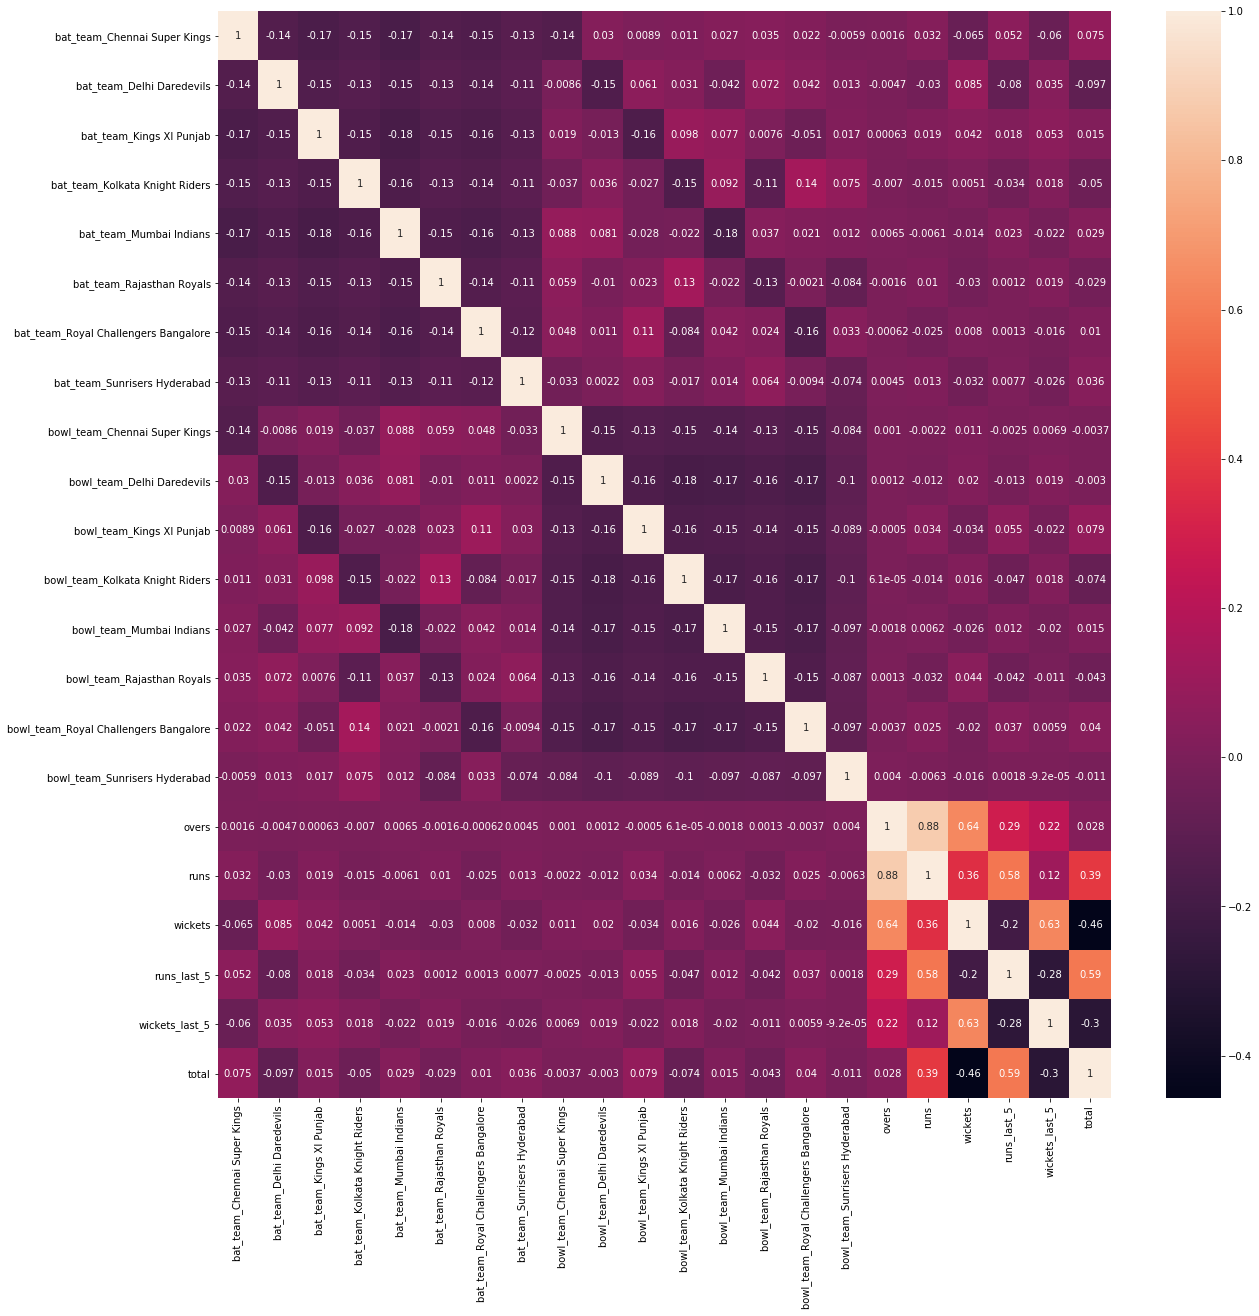

In [51]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(encoded_data.corr(), annot=True , ax=ax)

In [25]:
X_train = encoded_data.drop(labels = 'total' , axis=1)[encoded_data['date'].dt.year<=2016]
X_test = encoded_data.drop(labels = 'total' , axis=1)[encoded_data['date'].dt.year>=2017]

In [26]:
y_train = encoded_data[encoded_data['date'].dt.year<=2016]['total'].values
y_test = encoded_data[encoded_data['date'].dt.year>=2017]['total'].values

In [27]:
X_train.drop(labels='date',axis=1,inplace=True)
X_test.drop(labels='date',axis=1,inplace=True)

## Linear Regression

In [109]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
prediction = reg.predict(X_test)

In [74]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.118617546193295
MSE: 251.00792310417455
RMSE: 15.843229566732111


In [111]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 12.118617546193295
MSE: 251.00792310417455
RMSE: 15.843229566732111


In [112]:
reg.score(X_train , y_train)

0.6502133812161468

In [113]:
reg.score(X_test , y_test)

0.7522633566350525

Text(0.5, 1.0, 'Comparision')

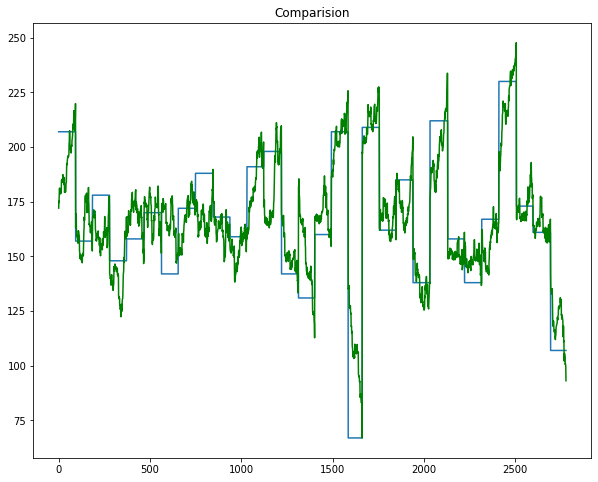

In [114]:
plt.figure(figsize=[10,8])
plt.plot(y_test)
plt.plot(prediction, color='green')

plt.title('Comparision')

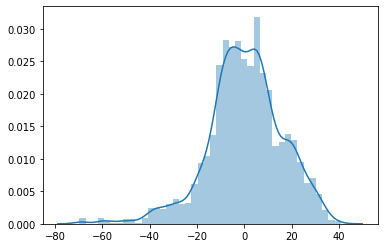

In [115]:
sns.distplot(y_test-prediction)

## Ridge Regression

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
ridge = Ridge()
parameters = {
    'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]
}

ridge_reg = RandomizedSearchCV(estimator=ridge , param_distributions = parameters ,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
ridge_reg.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=35 ........................................................
[CV] ......................................... alpha=35, total=   0.0s
[CV] alpha=35 ........................................................
[CV] ......................................... alpha=35, total=   0.0s
[CV] alpha=35 ........................................................
[CV] ......................................... alpha=35, total=   0.0s
[CV] alpha=35 ........................................................
[CV] ......................................... alpha=35, total=   0.0s
[CV] alpha=35 ........................................................
[CV] ......................................... alpha=35, total=   0.0s
[CV] alpha=30 ........................................................
[CV] ......................................... alpha=30, total=   0.0s
[CV] alpha=30 ........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ......................................... alpha=30, total=   0.0s
[CV] alpha=30 ........................................................
[CV] ......................................... alpha=30, total=   0.0s
[CV] alpha=1e-15 .....................................................
[CV] ...................................... alpha=1e-15, total=   0.1s
[CV] alpha=1e-15 .....................................................
[CV] ...................................... alpha=1e-15, total=   0.1s
[CV] alpha=1e-15 .....................................................
[CV] ...................................... alpha=1e-15, total=   0.1s
[CV] alpha=1e-15 .....................................................
[CV] ...................................... alpha=1e-15, total=   0.0s
[CV] alpha=1e-15 .....................................................
[CV] ...................................... alpha=1e-15, total=   0.1s
[CV] alpha=20 ........................................................
[CV] .

/home/kushank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.24662e-20): result may not be accurate.
  overwrite_a=True).T


[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.0s
[CV] alpha=1e-08 .....................................................
[CV] ...................................... alpha=1e-08, total=   0.0s
[CV] alpha=1e-08 .....................................................
[CV] ...................................... alpha=1e-08, total=   0.0s
[CV] alpha=1e-08 .....................................................
[CV] ...................................... alpha=1e-08, total=   0.0s
[CV] alpha=1e-08 .....................................................
[CV] ...................................... alpha=1e-08, total=   0.0s
[CV] alpha=1e-08 .....................................................
[CV] .

/home/kushank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.47288e-18): result may not be accurate.
  overwrite_a=True).T
/home/kushank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.53988e-18): result may not be accurate.
  overwrite_a=True).T
/home/kushank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.43813e-18): result may not be accurate.
  overwrite_a=True).T
/home/kushank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.60409e-18): result may not be accurate.
  overwrite_a=True).T
/home/kushank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.58371e-18): result may not be accurate.
  overwrite_a=True).T


[CV] ...................................... alpha=1e-10, total=   0.0s
[CV] alpha=40 ........................................................
[CV] ......................................... alpha=40, total=   0.0s
[CV] alpha=40 ........................................................
[CV] ......................................... alpha=40, total=   0.0s
[CV] alpha=40 ........................................................
[CV] ......................................... alpha=40, total=   0.0s
[CV] alpha=40 ........................................................
[CV] ......................................... alpha=40, total=   0.0s
[CV] alpha=40 ........................................................
[CV] ......................................... alpha=40, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=None, normalize=False,
                                   random_state=None, solver='auto',
                                   tol=0.001),
                   iid='deprecated', n_iter=10, n_jobs=1,
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 5, 10, 20, 30, 35,
                                                  40]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

In [33]:
pred_2 = ridge_reg.predict(X_test)

In [120]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred_2))
print('MSE:', metrics.mean_squared_error(y_test, pred_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_2)))

MAE: 12.118584408251246
MSE: 251.00850756690397
RMSE: 15.843248011910436


In [34]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred_2))
print('MSE:', metrics.mean_squared_error(y_test, pred_2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_2)))

MAE: 12.117294527005019
MSE: 251.03172964112724
RMSE: 15.843980864704655


In [36]:
ridge_reg.score(X_test , y_test)

-251.03172964112724

Text(0.5, 1.0, 'Comparision')

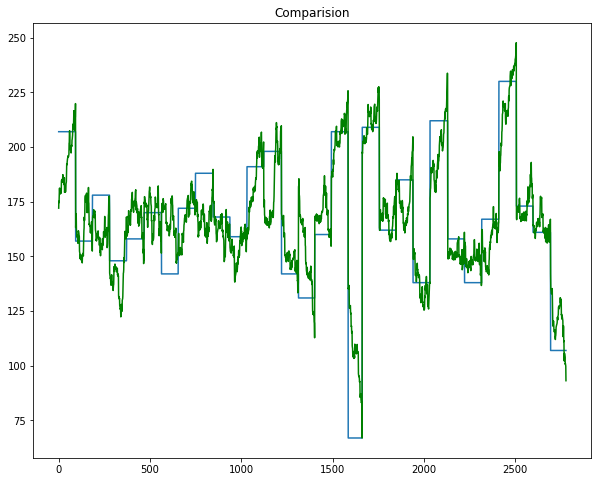

In [38]:
plt.figure(figsize=[10,8])
plt.plot(y_test)
plt.plot(pred_2, color='green')
plt.title('Comparision')

## Lasso Regression

In [45]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
lasso = Lasso()
parameters1 = {
    'alpha': [1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]
}

lasso_reg = RandomizedSearchCV(estimator=lasso , param_distributions = parameters1 ,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
lasso_reg.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=35 ........................................................
[CV] ......................................... alpha=35, total=   0.0s
[CV] alpha=35 ........................................................
[CV] ......................................... alpha=35, total=   0.0s
[CV] alpha=35 ........................................................
[CV] ......................................... alpha=35, total=   0.0s
[CV] alpha=35 ........................................................
[CV] ......................................... alpha=35, total=   0.0s
[CV] alpha=35 ........................................................
[CV] ......................................... alpha=35, total=   0.0s
[CV] alpha=30 ........................................................
[CV] ......................................... alpha=30, total=   0.0s
[CV] alpha=30 ........................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ......................................... alpha=30, total=   0.0s
[CV] alpha=30 ........................................................
[CV] ......................................... alpha=30, total=   0.0s
[CV] alpha=30 ........................................................
[CV] ......................................... alpha=30, total=   0.0s
[CV] alpha=1e-15 .....................................................


/home/kushank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4540962.186675368, tolerance: 2529.955696594561
  positive)


[CV] ...................................... alpha=1e-15, total=   1.5s
[CV] alpha=1e-15 .....................................................


/home/kushank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4461556.968411786, tolerance: 2547.0380710286604
  positive)


[CV] ...................................... alpha=1e-15, total=   1.6s
[CV] alpha=1e-15 .....................................................


/home/kushank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4567942.344821787, tolerance: 2667.8126904366463
  positive)


[CV] ...................................... alpha=1e-15, total=   1.7s
[CV] alpha=1e-15 .....................................................


/home/kushank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4124925.3101019016, tolerance: 2712.348891397666
  positive)


[CV] ...................................... alpha=1e-15, total=   1.5s
[CV] alpha=1e-15 .....................................................


/home/kushank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4566898.169749207, tolerance: 2646.1437660192796
  positive)


[CV] ...................................... alpha=1e-15, total=   1.5s
[CV] alpha=20 ........................................................
[CV] ......................................... alpha=20, total=   0.0s
[CV] alpha=20 ........................................................
[CV] ......................................... alpha=20, total=   0.1s
[CV] alpha=20 ........................................................
[CV] ......................................... alpha=20, total=   0.0s
[CV] alpha=20 ........................................................
[CV] ......................................... alpha=20, total=   0.1s
[CV] alpha=20 ........................................................
[CV] ......................................... alpha=20, total=   0.1s
[CV] alpha=1 .........................................................
[CV] .......................................... alpha=1, total=   0.1s
[CV] alpha=1 .........................................................
[CV] .

/home/kushank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 589202.593751845, tolerance: 2529.955696594561
  positive)


[CV] ...................................... alpha=1e-08, total=   1.4s
[CV] alpha=1e-08 .....................................................


/home/kushank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482835.82185958605, tolerance: 2547.0380710286604
  positive)


[CV] ...................................... alpha=1e-08, total=   1.4s
[CV] alpha=1e-08 .....................................................


/home/kushank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253599.47337836865, tolerance: 2667.8126904366463
  positive)


[CV] ...................................... alpha=1e-08, total=   1.5s
[CV] alpha=1e-08 .....................................................


/home/kushank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273552.7474546684, tolerance: 2712.348891397666
  positive)


[CV] ...................................... alpha=1e-08, total=   1.6s
[CV] alpha=1e-08 .....................................................


/home/kushank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328228.2559108827, tolerance: 2646.1437660192796
  positive)


[CV] ...................................... alpha=1e-08, total=   1.5s
[CV] alpha=1e-10 .....................................................


/home/kushank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 589199.3415436838, tolerance: 2529.955696594561
  positive)


[CV] ...................................... alpha=1e-10, total=   1.7s
[CV] alpha=1e-10 .....................................................


/home/kushank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 482834.70580263715, tolerance: 2547.0380710286604
  positive)


[CV] ...................................... alpha=1e-10, total=   1.4s
[CV] alpha=1e-10 .....................................................


/home/kushank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253595.10633033793, tolerance: 2667.8126904366463
  positive)


[CV] ...................................... alpha=1e-10, total=   1.4s
[CV] alpha=1e-10 .....................................................


/home/kushank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 273554.33741877694, tolerance: 2712.348891397666
  positive)


[CV] ...................................... alpha=1e-10, total=   1.4s
[CV] alpha=1e-10 .....................................................


/home/kushank/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 328224.7875914704, tolerance: 2646.1437660192796
  positive)


[CV] ...................................... alpha=1e-10, total=   1.5s
[CV] alpha=40 ........................................................
[CV] ......................................... alpha=40, total=   0.0s
[CV] alpha=40 ........................................................
[CV] ......................................... alpha=40, total=   0.0s
[CV] alpha=40 ........................................................
[CV] ......................................... alpha=40, total=   0.0s
[CV] alpha=40 ........................................................
[CV] ......................................... alpha=40, total=   0.0s
[CV] alpha=40 ........................................................
[CV] ......................................... alpha=40, total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ....................................... alpha=0.01, total=   0.2s
[CV] alpha=0.01 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   24.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=1,
                   param_distributions={'alpha': [1e-15, 1e-10, 1e-08, 0.001,
                                                  0.01, 1, 5, 10, 20, 30, 35,
                                                  40]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring='neg_mean_squared_error',
                   verbose=2)

In [46]:
pred_reg = lasso_reg.predict(X_test)

In [47]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred_3))
print('MSE:', metrics.mean_squared_error(y_test, pred_3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_3)))

MAE: 12.214053814850246
MSE: 262.3797366400714
RMSE: 16.19813991296752


In [43]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred_reg))
print('MSE:', metrics.mean_squared_error(y_test, pred_reg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_reg)))

MAE: 12.214053814850246
MSE: 262.3797366400714
RMSE: 16.19813991296752
